# Application A: Limiting Energy of a Quench

## BDCM

This example shows how to compute the limiting energy of a quench on a ransom regular graph with degree $d=4$.
We compute the fixed points of the BDCM with $c=1$ and the correct path length.
The rule code for the antiferromagnet with even tie-breaking is $11+00$.
From this fixed point we derive the enrgy and entropy.

In [1]:
import numpy as np
import pandas as pd
from src.experiments import load_pickle
from src.bdcm.fixed_point_iteration import run_bdcm
from src.bdcm.initialization import init_random_Gauss
from src.empirics.simulation import simulate_balanced_init
from src.config import RESULT_DIR
import numpy as np
from src.experiments import flatten
from pathlib import Path
import matplotlib.pyplot as plt


The following function runs the BDCM until convergence.

In [2]:
rule='11+00'
its = 5000
alpha = 0.98 # parameter for dampening
d = len(rule)-1 # d is the number of neighbours

res_1 = run_bdcm(its=its, 
                     alpha=alpha, 
                     rule=rule, 
                     c=1,
                     d=d,
                     p=1,
                     init_func=init_random_Gauss,
                     epsilon=10e-10)

[Fixed Point It.] acc=0.0000000009898231 |: : 875826it [00:00, 1083302.37it/s]                                                             

Stopping early because of convergence at iteration 1324 with distance 0.0000000009898231.


We can get the interesting observables from the result dictionary. 

In [3]:
res_1['entropy']/np.log(2), res_1['energy_attr']

(0.8679342606191441, -0.47587665864101625)

## DCM

THe result for the dynamical cavity method is simply obtained by setting the cycle c=0, which will not add a boundary condition for the cycle.

In [4]:
res_2 = run_bdcm(its=its, 
                     alpha=alpha, 
                     rule=rule, 
                     c=0,
                     d=d,
                     p=2, # since we want to do a fair comparison, we set p one higher here than in the BDCM
                     init_func=init_random_Gauss,
                     epsilon=10e-10)

[Fixed Point It.] acc=0.0000000009940684 |: : 890445it [00:00, 1150841.11it/s]                                                             

Stopping early because of convergence at iteration 1335 with distance 0.0000000009940684.


The relevant observable for the energy is now the energy of the final configuration in the path.

In [5]:
res_2['entropy']/np.log(2), res_2['energy_pathend']

(1.0000000000000002, -0.2812499999894403)

## Empirics

We finally compare to the empirically observed result, by running the simulations on a concrete graph.

In [6]:
r = '11+00'
samples = 1000
d = len(r)-1

simulate_balanced_init(r,path=str(RESULT_DIR / f'application_A' / 'empirics'), 
                           n=1000, samples=samples, 
                           record_energy=True,record_density=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.34it/s]


The energy trajectories decay fast, but for $p=1$ the energy predicted is still quite far off.

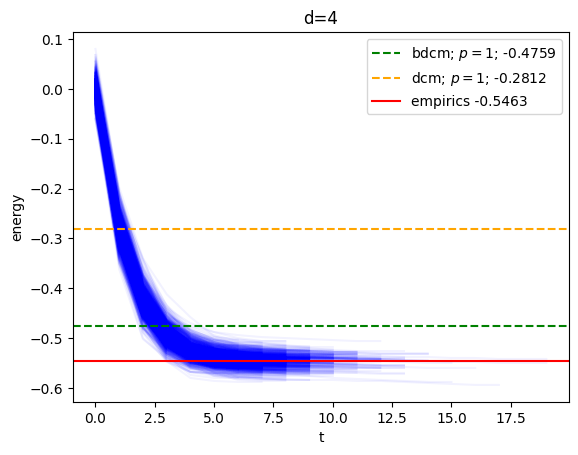

In [10]:
path = f'results/application_A/empirics'
results = flatten([load_pickle(f) for f in  Path(path).glob(f'*.pkl')])

df = pd.DataFrame(results)
for dens in df.energy_history:
    dens = np.array(dens)
    plt.plot(dens,alpha=0.05,c='blue')
plt.title(f'd={d}')
plt.xlabel('t')
plt.ylabel('energy')
plt.axhline(res_1["energy_attr"],label=f'bdcm; $p=1$; {res_1["energy_attr"]:.4f}',linestyle='dashed',c='green')
plt.axhline(res_2["energy_pathend"],label=f'dcm; $p=1$; {res_2["energy_pathend"]:.4f}',linestyle='dashed',c='orange')
emp = df.energy_history.apply(lambda x: x[-1]).mean()
plt.axhline(emp,c='red',label=f'empirics {emp:.4f}')
plt.legend()
plt.show()